In [1]:
!pip install catboost
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r'drive/MyDrive/Skripsi/citarum.csv')

In [4]:
#Dropping unnecessary columns
cols_to_drop = ['Measuring_Point', 'Date', 'Temperatur', 'Debit', 'Surfactant', 
                'Phenol', 'Phospate', 'BOD', 'COD', 'OG', 'Fecal_Coliform', 'Total_Coliform']
df = df.drop(cols_to_drop, axis=1)

In [5]:
#Seperating X & y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
#Splitting test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 29)

In [7]:
#Applying data standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#Empty result dataframe
res = pd.DataFrame(index=['precision','recall','f1-score','accuracy'])

In [9]:
#Result Function
def result(clf, Classifier_Name):
  #Model Fitting
  clf.fit(X_train, y_train)
  
  #Showing performance result
  y_pred=clf.predict(X_test)
  from sklearn.metrics import classification_report
  clf_res = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
  
  #Append classifier result to result DataFrame
  res[str(Classifier_Name)] = [clf_res['weighted avg']['precision'],
                               clf_res['weighted avg']['recall'], 
                               clf_res['weighted avg']['f1-score'], 
                               clf_res['accuracy']]
  display(res)

  #Creating confusion matrix illustration
  from sklearn.metrics import ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, xticks_rotation="vertical", 
    display_labels=['Unsuitable', 'Very Poor', 'Poor', 'Good', 'Excellent'])
  disp.ax_.set_title("Confusion Matrix for " + str(Classifier_Name) + " Classifier")

,Decision Tree
precision,0.905882
recall,0.921569
f1-score,0.911765
accuracy,0.921569


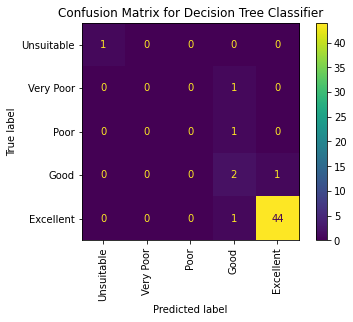

In [10]:
#Using Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
result(dt_clf, "Decision Tree")

,Decision Tree,Random Forest
precision,0.905882,0.828431
recall,0.921569,0.882353
f1-score,0.911765,0.854522
accuracy,0.921569,0.882353


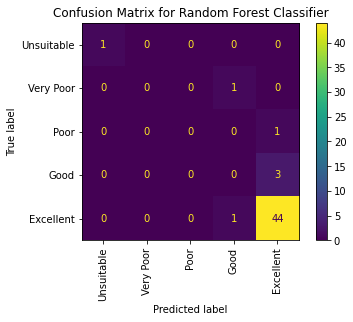

In [11]:
# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
result(rf_clf, "Random Forest")

,Decision Tree,Random Forest,SVM
precision,0.905882,0.828431,0.865248
recall,0.921569,0.882353,0.901961
f1-score,0.911765,0.854522,0.883205
accuracy,0.921569,0.882353,0.901961


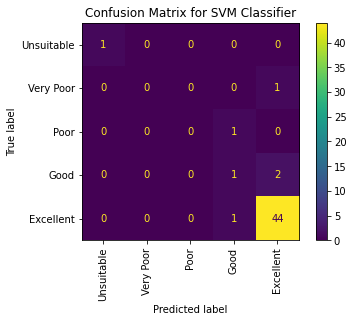

In [12]:
# Using Kernel SVM Classifier
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'rbf', random_state = 0)
result(svm_clf, "SVM")

,Decision Tree,Random Forest,SVM,Naive Bayes
precision,0.905882,0.828431,0.865248,0.900000
recall,0.921569,0.882353,0.901961,0.862745
f1-score,0.911765,0.854522,0.883205,0.868463
accuracy,0.921569,0.882353,0.901961,0.862745


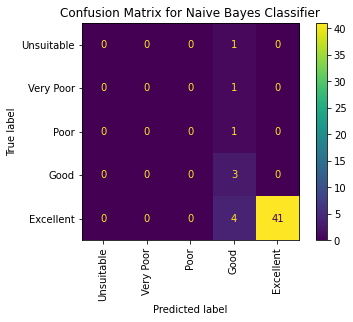

In [13]:
# Using Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
result(nb_clf, "Naive Bayes")

,Decision Tree,Random Forest,SVM,Naive Bayes,CatBoost
precision,0.905882,0.828431,0.865248,0.900000,0.886275
recall,0.921569,0.882353,0.901961,0.862745,0.901961
f1-score,0.911765,0.854522,0.883205,0.868463,0.892157
accuracy,0.921569,0.882353,0.901961,0.862745,0.901961


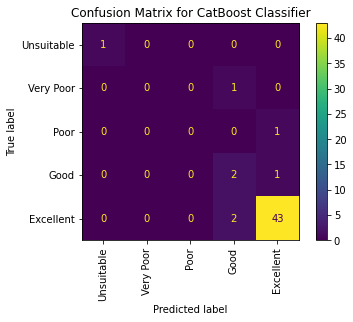

In [14]:
# Using CatBoost Classifier
from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier(random_seed=42, logging_level='Silent')
result(cb_clf, "CatBoost")